In [1]:
!pip install cleanvision

  Using cached cleanvision-0.3.6-py3-none-any.whl.metadata (51 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached cleanvision-0.3.6-py3-none-any.whl (55 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 6.2 MB/s eta 0:00:00a 0:00:01
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 6.3 MB/s eta 0:00:00a 0:00:01
Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl (39.4 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from cleanvision.imagelab import Imagelab

/Users/sebastianwefers/Developer/Tools/conda/base/envs/ViT/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initial number of images in the original folder: 9408
✅ Deleted 0 unreadable images.
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 9408/9408 [00:42<00:00, 218.86it/s]


Issue checks completed. 2368 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
         issue_type  num_images
0          odd_size        2022
1   near_duplicates         312
2              dark          29
3            blurry           3
4         grayscale           2
5             light           0
6  odd_aspect_ratio           0
7   low_information           0
8  exact_duplicates           0
No exact duplicates were found.
There are 155 pairs of near duplicates, displaying first few...


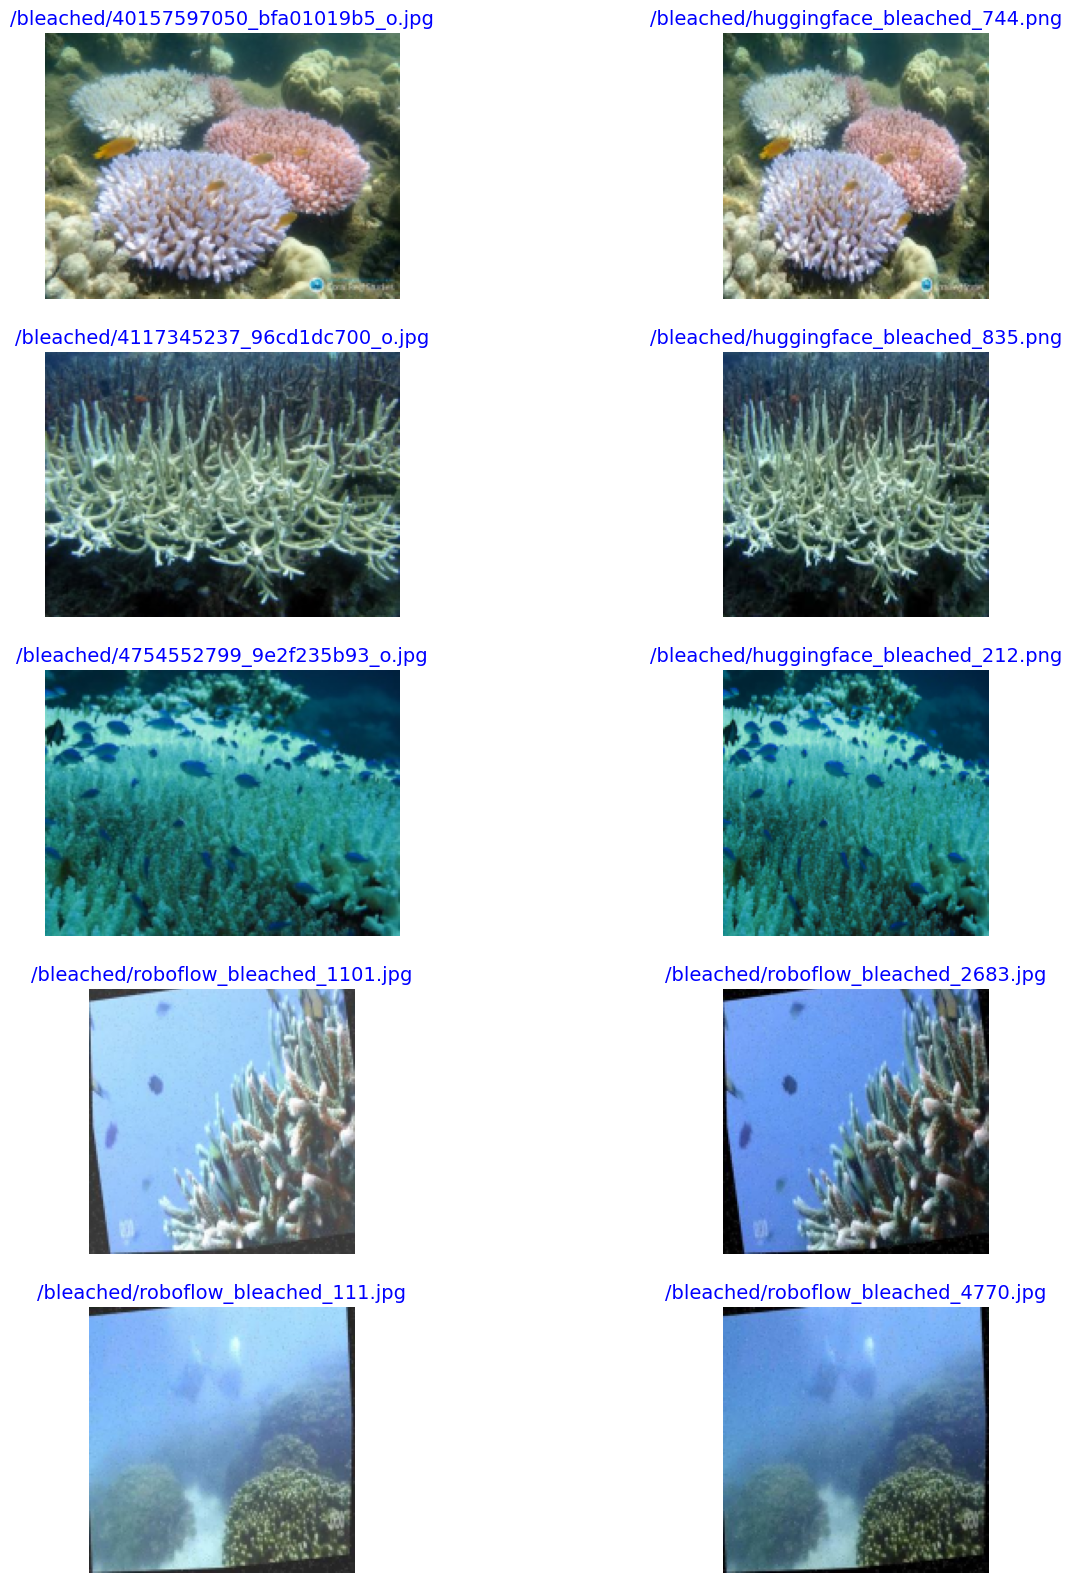

Moving Extra Duplicates:  42%|████▏     | 65/155 [00:00<00:00, 644.57it/s]

Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/bleached/huggingface_bleached_744.png -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/huggingface_bleached_744.png
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/bleached/huggingface_bleached_835.png -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/huggingface_bleached_835.png
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/bleached/huggingface_bleached_212.png -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/huggingface_bleached_212.png
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/bleached/roboflow_bleached_2683.jpg -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all

Moving Extra Duplicates: 100%|██████████| 155/155 [00:00<00:00, 568.30it/s]


Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/healthy/roboflow_healthy_4148.jpg -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/roboflow_healthy_4148.jpg
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/healthy/roboflow_healthy_2642.jpg -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/roboflow_healthy_2642.jpg
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/healthy/roboflow_healthy_3051.jpg -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/roboflow_healthy_3051.jpg
Moved duplicate: /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/healthy/roboflow_healthy_4503.jpg -> /Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data/duplicates/robofl

In [2]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm
from cleanvision.imagelab import Imagelab

def resize_img(img):
    """Resizes an image for visualization while avoiding issues with NoneType images."""
    if img is None:
        return None  # Return None if the image could not be read
    img_height = 150
    img_width = int((img_height / img.shape[0]) * img.shape[1])
    return cv2.resize(img, (img_width, img_height))

def delete_unreadable_images(file_paths):
    """Logs and deletes unreadable images."""
    deleted_images = []
    
    for file_path in file_paths:
        img = cv2.imread(file_path)
        if img is None:
            print(f"🚨 Deleting unreadable image: {file_path}")
            try:
                os.remove(file_path)
                deleted_images.append(file_path)
            except Exception as e:
                print(f"⚠️ Error deleting {file_path}: {e}")

    print(f"✅ Deleted {len(deleted_images)} unreadable images.")

def show_dups(dups, sdir, max_display=10):
    """Displays a limited number of duplicate image pairs.
    
    Even if a duplicate set contains more than two images, only the first two will be shown.
    """
    # Limit to the first max_display duplicate sets
    duplicate_sets_to_show = dups[:max_display]
    num_display = len(duplicate_sets_to_show)
    plt.figure(figsize=(15, num_display * 4))  # width, height

    for i, dup_set in enumerate(duplicate_sets_to_show):
        # Limit each duplicate set to a maximum of 2 images for display
        for j, path in enumerate(dup_set[:2]):
            img = cv2.imread(path)

            if img is None:
                print(f"⚠️ Warning: Skipping unreadable image {path}")
                continue

            img = resize_img(img)
            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Create a subplot grid with 2 columns
            plt.subplot(num_display, 2, i * 2 + j + 1)
            title = path.replace(sdir, '')
            plt.title(title, color='blue', fontsize=14)
            plt.axis('off')
            plt.imshow(img)

    plt.show()


def move_duplicates(dup_sets, duplicates_dir):
    """Moves all but one copy of each duplicate set to the duplicates folder."""
    if not os.path.exists(duplicates_dir):
        os.makedirs(duplicates_dir)

    for dup_set in tqdm(dup_sets, desc="Moving Extra Duplicates"):
        # Keep the first image in the dataset and move all others
        original = dup_set[0]
        extra_duplicates = dup_set[1:]  # All additional copies

        for file_path in extra_duplicates:
            try:
                new_path = os.path.join(duplicates_dir, os.path.basename(file_path))
                shutil.move(file_path, new_path)
                print(f"Moved duplicate: {file_path} -> {new_path}")
            except Exception as e:
                print(f"Error moving {file_path}: {e}")

def get_image_paths(sdir, extensions=('.png', '.jpg', '.jpeg')):
    image_paths = []
    for root, dirs, files in os.walk(sdir):
        # Exclude the duplicates folder from scanning
        if "duplicates" in dirs:
            dirs.remove("duplicates")
        image_paths.extend(
            os.path.join(root, file)
            for file in files
            if file.lower().endswith(extensions)
        )
    return image_paths


def analyze_dataset(sdir):
    duplicates_dir = os.path.join(sdir, "duplicates")  # Path for storing duplicates
    if not os.path.exists(sdir):
        print(f"Error: The directory {sdir} does not exist.")
        return
    if not os.listdir(sdir):
        print(f"Error: The directory {sdir} is empty.")
        return

    # Use get_image_paths to exclude images in the duplicates folder.
    all_images = get_image_paths(sdir)

    # Print the initial count of images before deduplication
    print(f"Initial number of images in the original folder: {len(all_images)}")

    # **Step 1: Delete unreadable images first**
    delete_unreadable_images(all_images)
    
    try:
        imagelab = Imagelab(filepaths=all_images)
        imagelab.find_issues()
        print(imagelab.issue_summary)
    except Exception as e:
        print(f"Failed to initialize Imagelab with directory {sdir}: {e}")
        return

    for issue_type in ['exact_duplicates', 'near_duplicates']:
        if duplicates := list(imagelab.info[issue_type]['sets']):
            plist = list(duplicates)
            print(f'There are {len(plist)} pairs of {issue_type.replace("_", " ")}, displaying first few...')

            # Show a few duplicate images (skip unreadable ones)
            show_dups(plist, sdir, max_display=5)

            # Move all duplicates (pass the full duplicate sets)
            move_duplicates(plist, duplicates_dir)
        else:
            print(f'No {issue_type.replace("_", " ")} were found.')

    print('***** Data set processing is completed *****')
    
    # Count remaining image files (excluding directories like the duplicates folder)
    remaining_images = get_image_paths(sdir)
    print(f"Remaining images in the original folder after deduplication: {len(remaining_images)}")





# 1. first daat set used for testing
#------------------------------------------------------------------------------------------------
#analyze_dataset("/notebooks/attention/coral_original")


# 2. second data set (huggingface)
#------------------------------------------------------------------------------------------------
#analyze_dataset(
#    "/Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/explore_new_data/data/total_dataset"
#)


# 3. third data set (roboflow)
#------------------------------------------------------------------------------------------------
#analyze_dataset(
#    "/Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/explore_new_data/data/Coral Reef Bleach Detection/all"
#)

# 4. all data sets combined
#------------------------------------------------------------------------------------------------
analyze_dataset(
    "/Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/all_data"
)

In [3]:
# confirm deduplication went well for

# 1) kaggle:
print("Rerun and confirm from very first experiment in August 2024")

# 2) hugginface
print(1599 - 1568)

# 3) roboflow
print(15697 - 7365)

# 4) all data sets combined
print(9408 - 9251)

Rerun and confirm from very first experiment in August 2024
31
8332
157


In [4]:
import os

duplicates_folder = "/Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/explore_new_data/data/total_dataset/duplicates"

if os.path.exists(duplicates_folder):
    if files := os.listdir(duplicates_folder):
        print(f"✅ {len(files)} duplicate images were moved to 'duplicates/'.")
        print(files[:10])  # Show a preview of moved files
    else:
        print("✅ No duplicates remain. The dataset is clean!")
else:
    print("No duplicates folder found. Deduplication was likely unnecessary.")


✅ 31 duplicate images were moved to 'duplicates/'.
['healthy_hbd_442.png', 'healthy_hbd_78.png', 'unhealthy_bu_130.png', 'healthy_bu_55.png', 'unhealthy_bu_7.png', 'healthy_hbd_41.png', 'dead_hbd_51.png', 'unhealthy_hbd_226.png', 'healthy_hbd_445.png', 'healthy_hbd_436.png']


In [19]:
import os

def count_files_in_directory(directory):
    """
    Counts the number of files in the specified directory.

    Args:
    directory (str): The path to the directory whose files are to be counted.

    Returns:
    int: The number of files in the directory.
    """
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return 0
    if not os.path.isdir(directory):
        print(f"Error: The path {directory} is not a directory.")
        return 0

    file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return file_count

# Usage example
directory_path = '/notebooks/attention/coral_original/duplicates'
file_count = count_files_in_directory(directory_path)
print(f'There are {file_count} files in the directory "{directory_path}".')


There are 21 files in the directory "/notebooks/attention/coral_original/duplicates".


Reading images from /notebooks/attention/coral_original
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/923 [00:00<?, ?it/s]

  0%|          | 0/923 [00:00<?, ?it/s]

Issue checks completed. 54 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
         issue_type  num_images
0  exact_duplicates          36
1   near_duplicates           8
2          odd_size           7
3            blurry           2
4              dark           1
5             light           0
6  odd_aspect_ratio           0
7   low_information           0
8         grayscale           0
There are 18 pairs of exact duplicates, displaying first few...


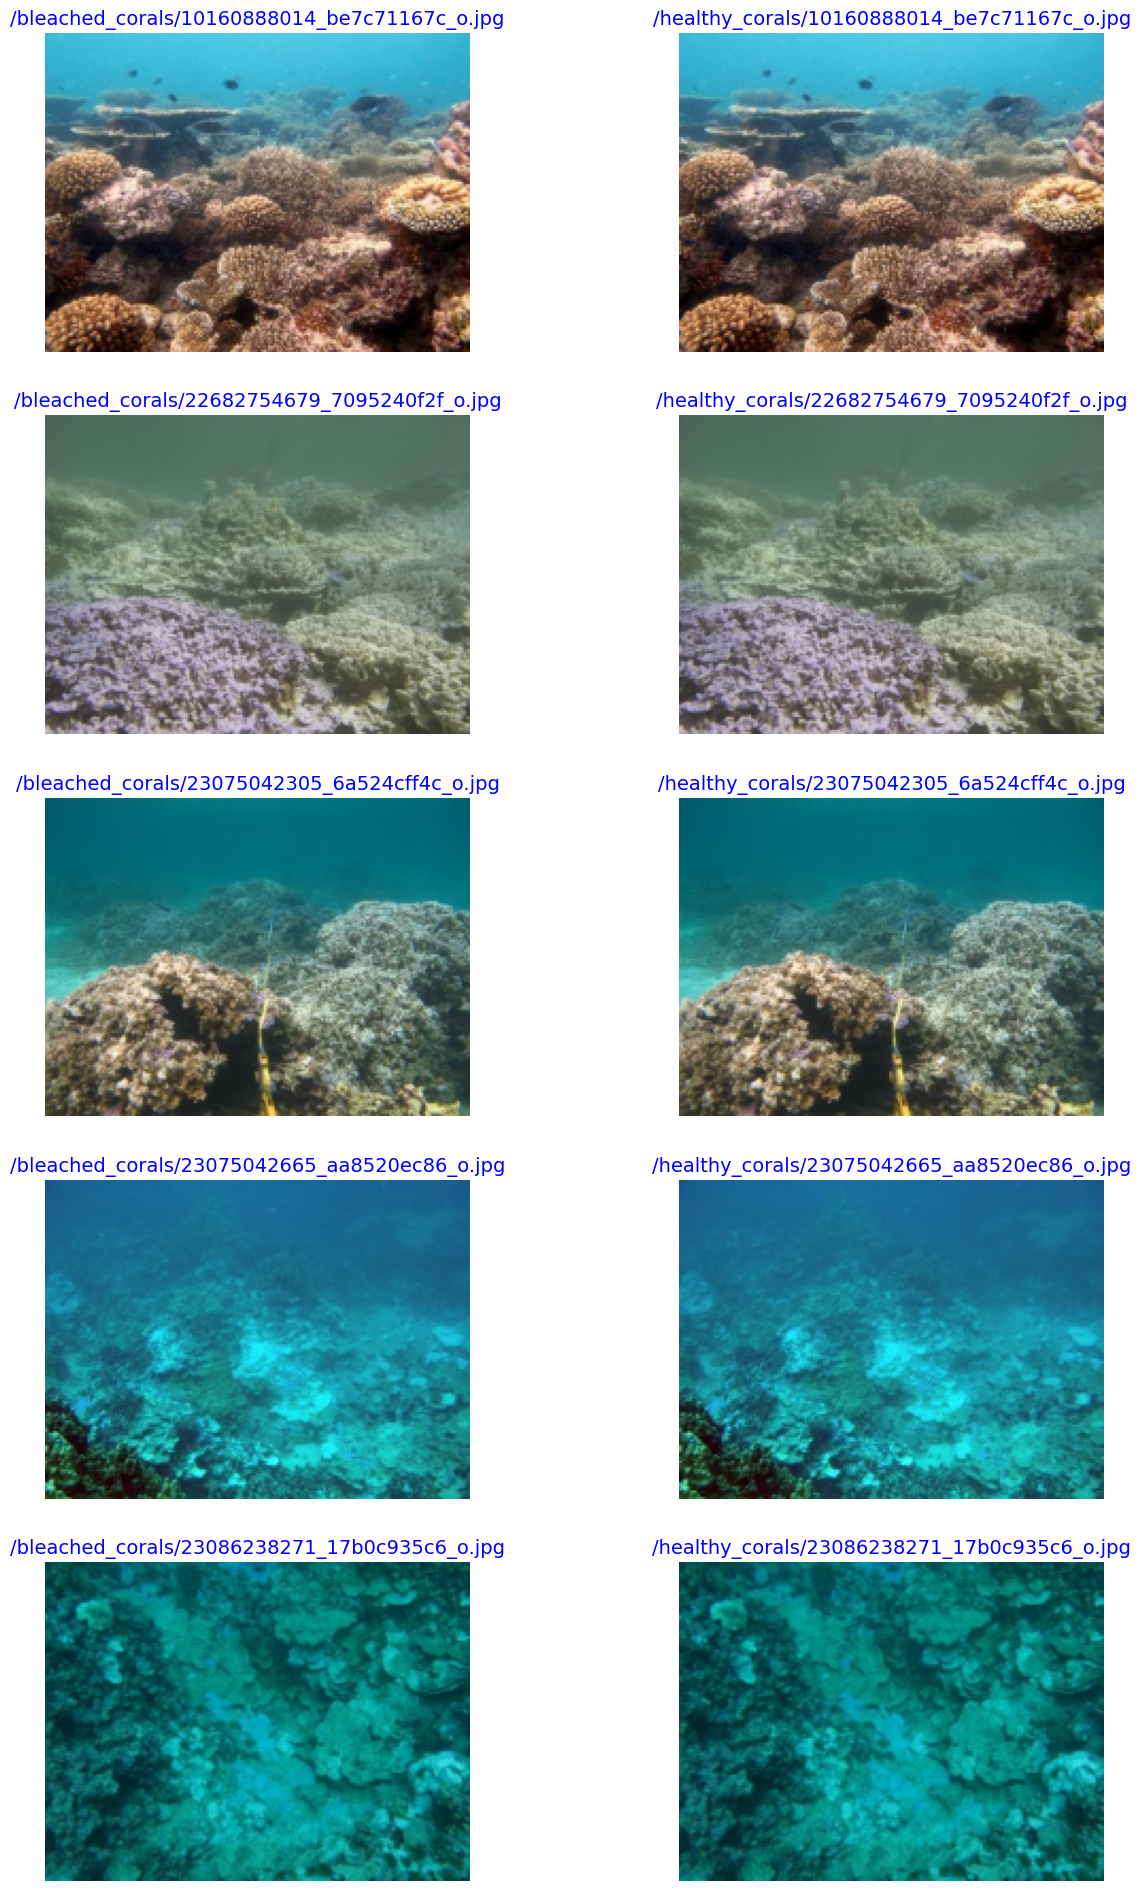

Moved '/notebooks/attention/coral_original/healthy_corals/10160888014_be7c71167c_o.jpg' to '/notebooks/attention/coral_original/duplicates/10160888014_be7c71167c_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/22682754679_7095240f2f_o.jpg' to '/notebooks/attention/coral_original/duplicates/22682754679_7095240f2f_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23075042305_6a524cff4c_o.jpg' to '/notebooks/attention/coral_original/duplicates/23075042305_6a524cff4c_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23075042665_aa8520ec86_o.jpg' to '/notebooks/attention/coral_original/duplicates/23075042665_aa8520ec86_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23086238271_17b0c935c6_o.jpg' to '/notebooks/attention/coral_original/duplicates/23086238271_17b0c935c6_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/27627673012_7a63b12bc9_o.jpg' to '/notebooks/attention/coral_original/duplicates/27627673012_7a63

[ WARN:0@2208.489] global loadsave.cpp:248 findDecoder imread_('/notebooks/attention/coral_original/bleached_corals/7174750970_0dd3823402_o.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2208.567] global loadsave.cpp:248 findDecoder imread_('/notebooks/attention/coral_original/healthy_corals/7174136896_96817e8eaa_o.jpg'): can't open/read file: check file path/integrity


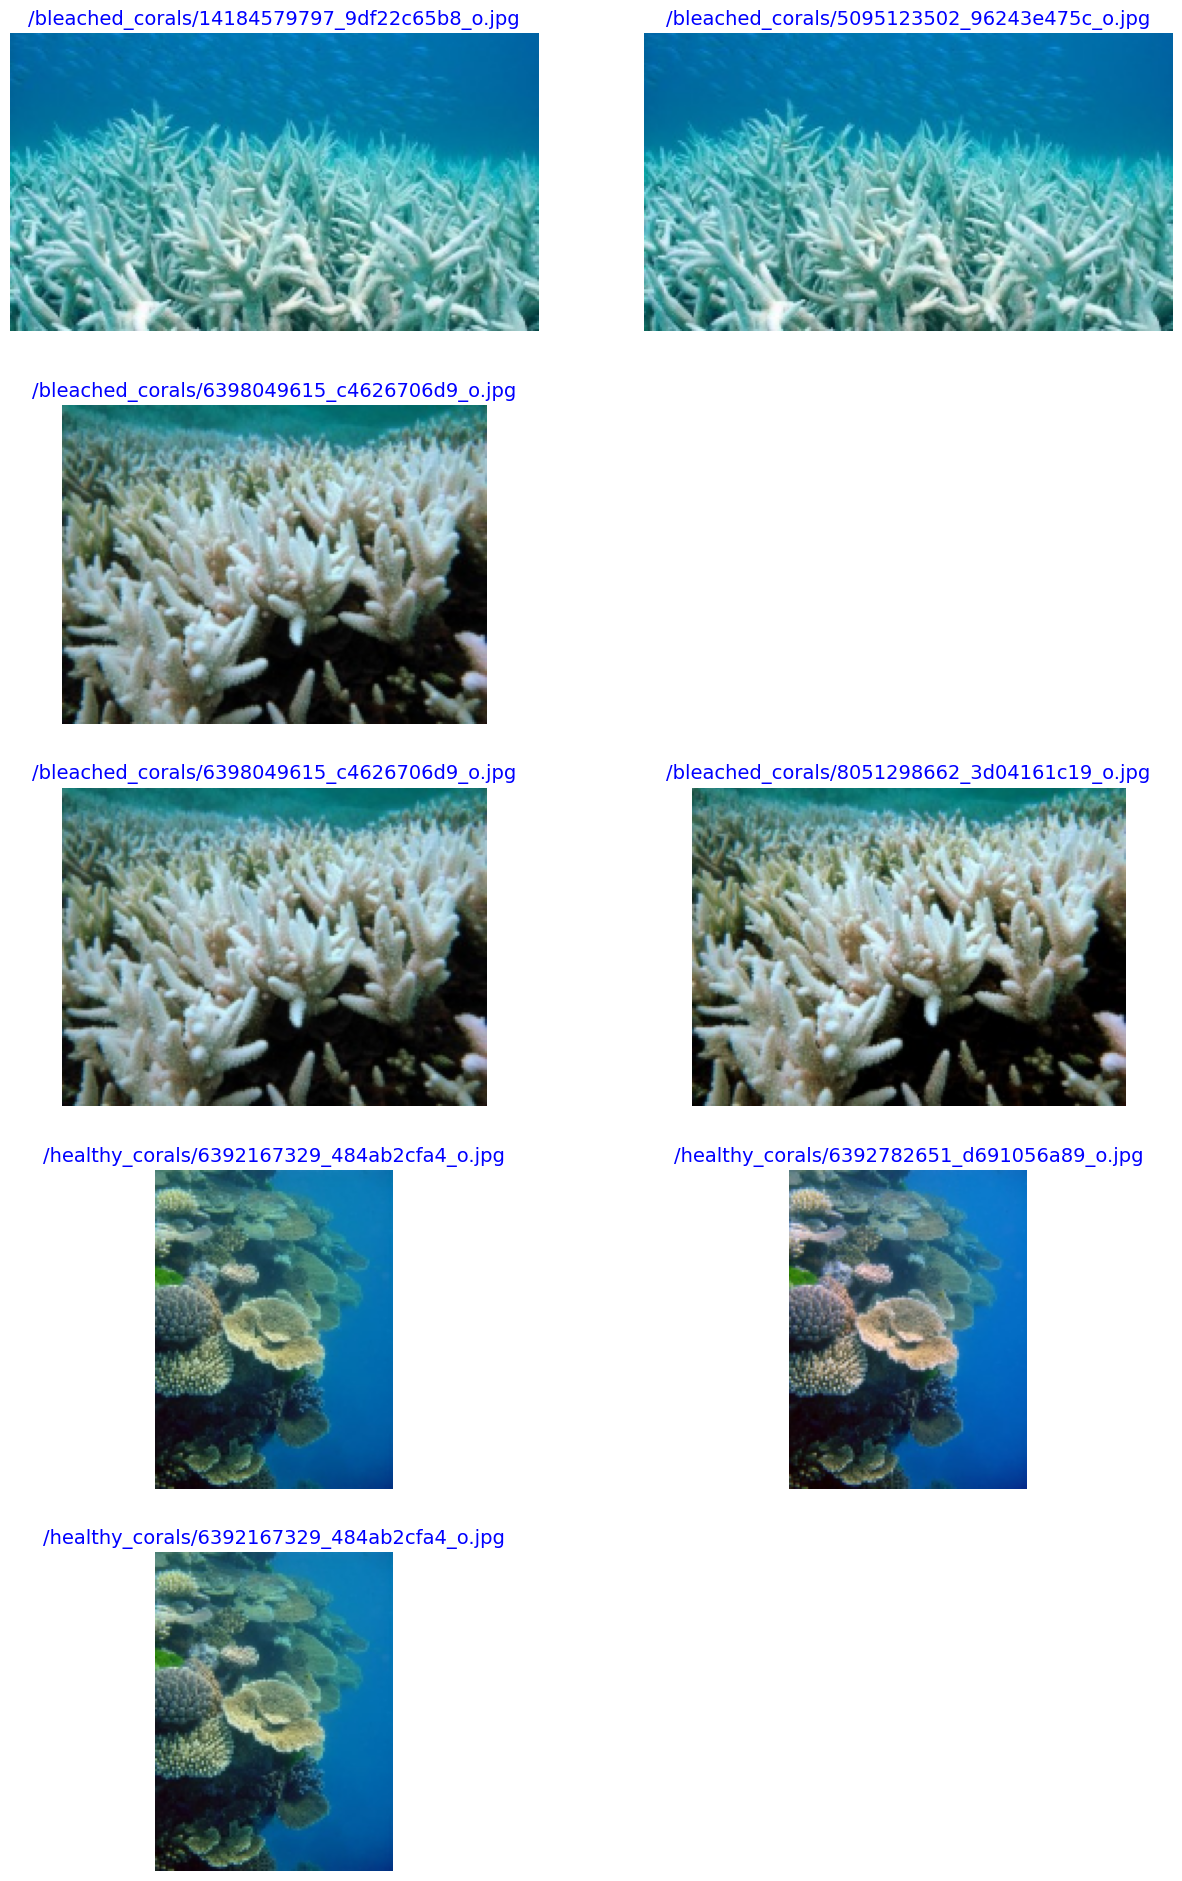

Moved '/notebooks/attention/coral_original/bleached_corals/5095123502_96243e475c_o.jpg' to '/notebooks/attention/coral_original/duplicates/5095123502_96243e475c_o.jpg'
Error: File does not exist /notebooks/attention/coral_original/bleached_corals/7174750970_0dd3823402_o.jpg
Moved '/notebooks/attention/coral_original/bleached_corals/8051298662_3d04161c19_o.jpg' to '/notebooks/attention/coral_original/duplicates/8051298662_3d04161c19_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/6392782651_d691056a89_o.jpg' to '/notebooks/attention/coral_original/duplicates/6392782651_d691056a89_o.jpg'
Error: File does not exist /notebooks/attention/coral_original/healthy_corals/7174136896_96817e8eaa_o.jpg
***** Data set processing is completed *****


In [17]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from cleanvision.imagelab import Imagelab

def get_title(fpath):
    return '/'.join(fpath.split('/')[4:])

def resize_img(img):
    img_height = 150
    img_width = int((img_height / img.shape[0]) * img.shape[1])
    return cv2.resize(img, (img_width, img_height))

def show_dups(dups, length, sdir):
    height = (length + 1) * 4
    plt.figure(figsize=(15, height))
    for i in range(length):
        for j, path in enumerate(dups[i]):
            img = cv2.imread(path)
            if img is None:
                print(f"Error: Could not load image at {path}")
                continue  # Skip this image
            img = resize_img(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(length, 2, i * 2 + j + 1)
            title = path.replace(sdir, '')
            plt.title(title, color='blue', fontsize=14)
            plt.axis('off')
            plt.imshow(img)
    plt.show()

def move_duplicates(dup_list, duplicates_dir):
    if not os.path.exists(duplicates_dir):
        os.makedirs(duplicates_dir)
    for file_path in dup_list:
        if not os.path.isfile(file_path):
            print(f"Error: File does not exist {file_path}")
            continue  # Skip non-existent files
        new_path = os.path.join(duplicates_dir, os.path.basename(file_path))
        shutil.move(file_path, new_path)
        print(f"Moved '{file_path}' to '{new_path}'")

def analyze_dataset(sdir):
    duplicates_dir = os.path.join(sdir, "duplicates")
    if not os.path.exists(sdir):
        print(f"Error: The directory {sdir} does not exist.")
        return
    if not os.listdir(sdir):
        print(f"Error: The directory {sdir} is empty.")
        return

    try:
        imagelab = Imagelab(sdir)
        imagelab.find_issues()
        print(imagelab.issue_summary)
    except Exception as e:
        print(f"Failed to initialize Imagelab with directory {sdir}: {e}")
        return

    delete_list = []
    for issue_type in ['exact_duplicates', 'near_duplicates']:
        duplicates = list(imagelab.info[issue_type]['sets'])
        if not duplicates:
            print(f'No {issue_type.replace("_", " ")} were found.')
        else:
            plist = []
            for ed in duplicates:
                for j in range(1, len(ed)):
                    plist.append([ed[0], ed[j]])

            print(f'There are {len(plist)} pairs of {issue_type.replace("_", " ")}, displaying first few...')
            show_dups(plist[:min(len(plist), 5)], min(len(plist), 5), sdir)  # Show a few for example

            move_duplicates([p[1] for p in plist], duplicates_dir)  # Move duplicates

    print('***** Data set processing is completed *****')

# Usage example, adjust the directories as needed:
#analyze_dataset("/notebooks/attention/coral_original")
#analyze_dataset("/Users/sebastianwefers/Desktop/Kolmogorov-Arnold-Fourier-Embeddings/data/coral_original")

In [20]:
import os

def count_files_in_directory(directory):
    """
    Counts the number of files in the specified directory.

    Args:
    directory (str): The path to the directory whose files are to be counted.

    Returns:
    int: The number of files in the directory.
    """
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return 0
    if not os.path.isdir(directory):
        print(f"Error: The path {directory} is not a directory.")
        return 0
    
    # Count only files, excluding subdirectories
    file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return file_count

# Define the base directory where these coral directories are located
base_directory = "/notebooks/attention/coral_original"

# Specify the paths to the coral directories
healthy_corals_dir = os.path.join(base_directory, "healthy_corals")
bleached_corals_dir = os.path.join(base_directory, "bleached_corals")

# Count files in each directory
healthy_count = count_files_in_directory(healthy_corals_dir)
bleached_count = count_files_in_directory(bleached_corals_dir)

# Print the results
print(f"There are {healthy_count} files in the '{healthy_corals_dir}' directory.")
print(f"There are {bleached_count} files in the '{bleached_corals_dir}' directory.")


There are 422 files in the '/notebooks/attention/coral_original/healthy_corals' directory.
There are 480 files in the '/notebooks/attention/coral_original/bleached_corals' directory.
